In [1]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt

from solver import Instance, Solver
from argparse import Namespace
from gurobipy import Model, GRB, tupledict
import json

In [2]:
city = "berlin"
demand_baseline = "1.00"
demand_type = "uniform"

instance_file = f'../instances/{city}_db={demand_baseline}_dt={demand_type}.json'

# f"{self.city_type.name.lower()}_" +\
# f"db={self.demand_baseline:.2f}_" +\
# f"dt={self.demand_type.name.lower().replace('_', '')}"

In [3]:
with open(instance_file, 'r') as file:
    instance_data = json.load(file)

print(instance_data.keys())

dict_keys(['name', 'num_time_intervals', 'num_scenarios', 'demand_baseline', 'demand_type', 'geography', 'scenarios'])


In [4]:
# 3 scenarios
pd.concat([pd.DataFrame(instance_data['scenarios'][0]['data']), 
           pd.DataFrame(instance_data['scenarios'][1]['data']), 
           pd.DataFrame(instance_data['scenarios'][2]['data']), 
           ], axis='columns')

,area_id,demand,required_couriers,area_id,demand,required_couriers,area_id,demand,required_couriers
0,10115,"[3, 1, 4, 3, 4, 3, 1, 5]","[1, 1, 1, 1, 1, 1, 1, 1]",10115,"[1, 4, 5, 2, 3, 1, 4, 3]","[1, 1, 1, 1, 1, 1, 1, 1]",10115,"[5, 1, 3, 2, 4, 0, 3, 2]","[1, 1, 1, 1, 1, 0, 1, 1]"
1,10117,"[2, 1, 4, 1, 2, 4, 5, 0]","[1, 1, 1, 1, 1, 1, 1, 0]",10117,"[2, 1, 2, 2, 2, 0, 3, 0]","[1, 1, 1, 1, 1, 0, 1, 0]",10117,"[0, 0, 1, 1, 6, 0, 3, 2]","[0, 0, 1, 1, 2, 0, 1, 1]"
2,10119,"[4, 1, 2, 2, 2, 2, 0, 3]","[1, 1, 1, 1, 1, 1, 0, 1]",10119,"[3, 0, 1, 2, 1, 2, 4, 0]","[1, 0, 1, 1, 1, 1, 1, 0]",10119,"[0, 3, 0, 3, 2, 0, 0, 4]","[0, 1, 0, 1, 1, 0, 0, 1]"
3,10178,"[2, 3, 2, 0, 2, 3, 2, 1]","[1, 1, 1, 0, 1, 1, 1, 1]",10178,"[1, 2, 1, 0, 1, 1, 5, 1]","[1, 1, 1, 0, 1, 1, 1, 1]",10178,"[1, 2, 2, 1, 1, 2, 1, 4]","[1, 1, 1, 1, 1, 1, 1, 1]"
4,10179,"[2, 1, 0, 1, 2, 5, 2, 1]","[1, 1, 0, 1, 1, 1, 1, 1]",10179,"[3, 4, 1, 1, 1, 2, 1, 2]","[1, 1, 1, 1, 1, 1, 1, 1]",10179,"[5, 1, 1, 1, 0, 4, 3, 3]","[1, 1, 1, 1, 0, 1, 1, 1]"
5,10243,"[9, 4, 3, 4, 6, 1, 1, 2]","[2, 1, 1, 1, 2, 1, 1, 1]",10243,"[4, 4, 2, 1, 5, 4, 8, 4]","[1, 1, 1, 1, 1, 1, 2, 1]",10243,"[3, 3, 2, 5, 8, 2, 2, 4]","[1, 1, 1, 1, 2, 1, 1, 1]"
6,10245,"[2, 3, 4, 1, 4, 3, 6, 2]","[1, 1, 1, 1, 1, 1, 2, 1]",10245,"[4, 4, 5, 1, 0, 3, 5, 5]","[1, 1, 1, 1, 0, 1, 1, 1]",10245,"[4, 1, 6, 4, 4, 5, 6, 2]","[1, 1, 2, 1, 1, 1, 2, 1]"
7,10247,"[6, 1, 3, 2, 1, 9, 4, 5]","[2, 1, 1, 1, 1, 2, 1, 1]",10247,"[2, 3, 2, 6, 4, 2, 4, 3]","[1, 1, 1, 2, 1, 1, 1, 1]",10247,"[5, 3, 2, 5, 8, 3, 8, 5]","[1, 1, 1, 1, 2, 1, 2, 1]"
8,10249,"[3, 1, 0, 4, 8, 4, 2, 3]","[1, 1, 0, 1, 2, 1, 1, 1]",10249,"[2, 1, 4, 3, 6, 1, 4, 6]","[1, 1, 1, 1, 2, 1, 1, 2]",10249,"[5, 5, 2, 2, 1, 3, 6, 5]","[1, 1, 1, 1, 1, 1, 2, 1]"
9,10315,"[1, 2, 5, 4, 2, 1, 5, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",10315,"[2, 3, 2, 4, 5, 5, 3, 5]","[1, 1, 1, 1, 1, 1, 1, 1]",10315,"[3, 2, 5, 4, 3, 4, 3, 3]","[1, 1, 1, 1, 1, 1, 1, 1]"


In [5]:
regions = instance_data['geography']['city']['regions']
print(regions)
print(regions[0])

[{'id': 3, 'population': 251633, 'surface_area': 28.36, 'areas': [{'id': '10789', 'population': 4899, 'surface_area': 0.59, 'avg_distance_to_depot': 0.359}, {'id': '10777', 'population': 11740, 'surface_area': 0.91, 'avg_distance_to_depot': 0.544}, {'id': '10779', 'population': 6411, 'surface_area': 0.68, 'avg_distance_to_depot': 0.372}, {'id': '10717', 'population': 14456, 'surface_area': 1.09, 'avg_distance_to_depot': 0.442}, {'id': '10719', 'population': 11845, 'surface_area': 1.16, 'avg_distance_to_depot': 0.445}, {'id': '10707', 'population': 9216, 'surface_area': 1.13, 'avg_distance_to_depot': 0.41}, {'id': '10585', 'population': 13958, 'surface_area': 1.02, 'avg_distance_to_depot': 0.493}, {'id': '10589', 'population': 14105, 'surface_area': 2.42, 'avg_distance_to_depot': 0.628}, {'id': '10625', 'population': 10001, 'surface_area': 0.83, 'avg_distance_to_depot': 0.369}, {'id': '10587', 'population': 10587, 'surface_area': 1.94, 'avg_distance_to_depot': 0.731}, {'id': '10623', 'p

# Area - region assignment

In [9]:
area_region_map = {}
for region in regions:
    areas = region['areas'] 
    for area in areas:
        area_region_map[area['id']] = region['id']

In [17]:
data_ = pd.DataFrame(instance_data['scenarios'][0]['data'])
data_ = (
    data_
    .assign(
        region_id = data_['area_id'].map(area_region_map)
    )
    .sort_values(['region_id', 'area_id'])
)[['region_id', 'area_id', 'demand', 'required_couriers']]
data_

,region_id,area_id,demand,required_couriers
6,0,10245,"[2, 3, 4, 1, 4, 3, 6, 2]","[1, 1, 1, 1, 1, 1, 2, 1]"
7,0,10247,"[6, 1, 3, 2, 1, 9, 4, 5]","[2, 1, 1, 1, 1, 2, 1, 1]"
8,0,10249,"[3, 1, 0, 4, 8, 4, 2, 3]","[1, 1, 0, 1, 2, 1, 1, 1]"
9,0,10315,"[1, 2, 5, 4, 2, 1, 5, 1]","[1, 1, 1, 1, 1, 1, 1, 1]"
10,0,10317,"[3, 3, 1, 4, 5, 3, 3, 3]","[1, 1, 1, 1, 1, 1, 1, 1]"
11,0,10318,"[1, 2, 4, 2, 4, 5, 0, 2]","[1, 1, 1, 1, 1, 1, 0, 1]"
12,0,10319,"[3, 4, 2, 3, 1, 2, 3, 2]","[1, 1, 1, 1, 1, 1, 1, 1]"
13,0,10365,"[2, 5, 0, 3, 4, 2, 5, 4]","[1, 1, 0, 1, 1, 1, 1, 1]"
14,0,10367,"[3, 2, 3, 4, 1, 1, 1, 3]","[1, 1, 1, 1, 1, 1, 1, 1]"
15,0,10369,"[1, 4, 1, 0, 4, 2, 2, 3]","[1, 1, 1, 0, 1, 1, 1, 1]"


In [22]:
# Generate several days instances 
city = 'berlin'

days = pd.DataFrame([
    [0, "1.00", "uniform"], # Monday
    [1, "1.00", "uniform"], # Tuesday
    [2, "1.00", "uniform"], # Wednesday
    [3, "1.00", "uniform"], # Thursday
    [4, "1.00", "uniform"], # Friday
    [5, "1.00", "uniform"], # Satuday
    [6, "1.00", "uniform"], # Sunday
], columns=['day', 'demand_baseline', 'demand_type']
)

demand = []
for i, day in days.iterrows():
    key = f'{city}_db={demand_baseline}_dt={demand_type}'

    instance_file = f'../instances/{city}_db={demand_baseline}_dt={demand_type}.json'
    with open(instance_file, 'r') as file:
        instance_data = json.load(file)

    scenario = random.randint(0, instance_data['num_scenarios'])
    data_ = (
        pd.DataFrame(instance_data['scenarios'][scenario]['data'])
        .assign(
            day = day['day']
        )
    )
    demand.append(data_)

demand_df = pd.concat(demand)
# Add region
demand_df['region_id'] = demand_df['area_id'].map(area_region_map)

demand_df = demand_df[['day', 'region_id', 'area_id', 'demand', 'required_couriers']]
demand_df.head(20)

,day,region_id,area_id,demand,required_couriers
0,0,1,10115,"[2, 3, 0, 2, 3, 3, 2, 0]","[1, 1, 0, 1, 1, 1, 1, 0]"
1,0,1,10117,"[2, 0, 2, 1, 3, 2, 2, 1]","[1, 0, 1, 1, 1, 1, 1, 1]"
2,0,1,10119,"[2, 2, 2, 1, 3, 0, 2, 2]","[1, 1, 1, 1, 1, 0, 1, 1]"
3,0,1,10178,"[0, 3, 3, 1, 3, 5, 0, 1]","[0, 1, 1, 1, 1, 1, 0, 1]"
4,0,1,10179,"[3, 0, 6, 1, 3, 1, 3, 5]","[1, 0, 2, 1, 1, 1, 1, 1]"
5,0,2,10243,"[3, 0, 4, 5, 6, 3, 5, 2]","[1, 0, 1, 1, 2, 1, 1, 1]"
6,0,0,10245,"[4, 2, 3, 2, 4, 4, 0, 2]","[1, 1, 1, 1, 1, 1, 0, 1]"
7,0,0,10247,"[6, 1, 0, 3, 3, 4, 2, 8]","[2, 1, 0, 1, 1, 1, 1, 2]"
8,0,0,10249,"[5, 3, 3, 4, 5, 6, 0, 5]","[1, 1, 1, 1, 1, 2, 0, 1]"
9,0,0,10315,"[3, 7, 0, 3, 3, 4, 7, 3]","[1, 2, 0, 1, 1, 1, 2, 1]"


In [ ]:
# Define the arguments as a dictionary
arguments = {
    'model': 'base', # choices=('base', 'fixed', 'partflex', 'flex')
    'instance': instance_file,
    'outsourcing_cost_multiplier': 1.5,
    'regional_multiplier': 2.0,
    'global_multiplier': 3.0,
    'max_n_shifts': 10,
    'output': 'output.txt'
}

# Create a Namespace object from the dictionary
args = Namespace(**arguments)

# Solver

In [ ]:
if False:
    parser = ArgumentParser(prog='solver', description='Solves one of the shift scheduling models for LMD')
    parser.add_argument('-m', '--model', action='store', choices=('base', 'fixed', 'partflex', 'flex'), required=True)
    parser.add_argument('-i', '--instance', action='store', required=True)
    parser.add_argument('-c', '--outsourcing-cost-multiplier', action='store', type=float, required=True)
    parser.add_argument('-r', '--regional-multiplier', action='store', type=float, required=True)
    parser.add_argument('-g', '--global-multiplier', action='store', type=float, required=True)
    parser.add_argument('-u', '--max-n-shifts', action='store', type=int)
    parser.add_argument('-o', '--output', action='store')
    args = parser.parse_args()

In [ ]:
i = Instance(args=args)
solver = Solver(args=args, i=i)

obj_value, x, i = solver.return_solve_base()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 14200 rows, 14632 columns and 24472 nonzeros
Model fingerprint: 0x5b303499
Variable types: 14160 continuous, 472 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 3e+02]
Found heuristic solution: objective 1421.0500000
Presolve removed 14178 rows and 14565 columns
Presolve time: 0.06s
Presolved: 22 rows, 67 columns, 88 nonzeros
Found heuristic solution: objective 560.3250000
Variable types: 46 continuous, 21 integer (0 binary)

Root relaxation: objective 5.363750e+02, 21 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0        

In [ ]:
print(i.periods)

[0, 1, 2, 3, 4, 5, 6, 7]


In [ ]:
demand_area_period = {}
demand_area_period_ = {}

for a in i.areas:
    for theta in i.periods:
        scenarios_with_demand = [s for s in i.scenarios if i.srequired[s, a, theta] > 0]
        required_demand = sum([i.srequired[s, a, theta] for s in i.scenarios])
        demand_area_period[str(a)+'_'+str(theta)] = required_demand
        for s in i.scenarios:
            demand_area_period_[str(a)+'_'+str(theta)+'_'+str(s)] = i.srequired[s, a, theta]

In [ ]:
scenarios_with_demand = (
    pd.DataFrame({'r_couriers': demand_area_period_})
    .reset_index()
)

scenarios_with_demand = scenarios_with_demand .assign(
    demand_key = scenarios_with_demand['index'].apply(lambda x: '_'.join(x.split('_')[:-1])),
    scenario = scenarios_with_demand['index'].apply(lambda x: int(x.split('_')[-1]))
)
scenarios_with_demand

,index,r_couriers,demand_key,scenario
0,10115_0_0,1,10115_0,0
1,10115_0_1,1,10115_0,1
2,10115_0_10,1,10115_0,10
3,10115_0_11,1,10115_0,11
4,10115_0_12,1,10115_0,12
...,...,...,...,...
14155,10999_7_5,1,10999_7,5
14156,10999_7_6,1,10999_7,6
14157,10999_7_7,1,10999_7,7
14158,10999_7_8,1,10999_7,8


In [ ]:
hiring_costs = sum(x[a, theta].X for a, theta in x)
#print(hiring_costs)

hired_couriers = {
    a: [int(x[a, theta].X) for theta in i.periods] for a in i.areas
}
hired_couriers

hired_couriers_df = (
    pd.DataFrame(hired_couriers)
    .reset_index()
    .melt(id_vars='index')
)

hired_couriers_df.columns = ['period', 'area', 'couriers']
hired_couriers_df['demand_key'] = hired_couriers_df['area']+'_'+hired_couriers_df['period'].astype(str)
#hired_couriers_df['demand'] = hired_couriers_df['demand_key'].map(demand_area_period)
hired_couriers_df

scenarios_hired_couriers_df = (
    pd.merge(scenarios_with_demand[['r_couriers','demand_key','scenario']], 
             hired_couriers_df, on='demand_key', how='left')
    .sort_values(['demand_key', 'scenario'])
)
scenarios_hired_couriers_df['outsource_couriers'] = (scenarios_hired_couriers_df['r_couriers'] - \
                                                     scenarios_hired_couriers_df['couriers']).clip(lower=0)

scenarios_hired_couriers_df = scenarios_hired_couriers_df[['area', 'period', 'demand_key', 'scenario', 'couriers', 'outsource_couriers', 'r_couriers']]
scenarios_hired_couriers_df.head(30)

,area,period,demand_key,scenario,couriers,outsource_couriers,r_couriers
0,10115,0,10115_0,0,1,0,1
1,10115,0,10115_0,1,1,0,1
12,10115,0,10115_0,2,1,0,1
23,10115,0,10115_0,3,1,0,1
24,10115,0,10115_0,4,1,0,1
25,10115,0,10115_0,5,1,0,1
26,10115,0,10115_0,6,1,0,1
27,10115,0,10115_0,7,1,0,1
28,10115,0,10115_0,8,1,0,0
29,10115,0,10115_0,9,1,0,0


In [ ]:
(
    scenarios_hired_couriers_df
    .groupby('demand_key')
    .agg({'couriers': ['mean', 'std'], 
          'outsource_couriers': ['mean', 'std'], 
          'r_couriers': ['min', 'max']}
    ).head(30)
)

couriers      outsource_couriers           r_couriers    
               mean  std               mean       std        min max
demand_key                                                          
10115_0         1.0  0.0           0.033333  0.182574          0   2
10115_1         1.0  0.0           0.033333  0.182574          0   2
10115_2         1.0  0.0           0.033333  0.182574          0   2
10115_3         1.0  0.0           0.000000  0.000000          0   1
10115_4         1.0  0.0           0.033333  0.182574          0   2
10115_5         1.0  0.0           0.000000  0.000000          0   1
10115_6         1.0  0.0           0.033333  0.182574          0   2
10115_7         1.0  0.0           0.000000  0.000000          0   1
10117_0         1.0  0.0           0.033333  0.182574          0   2
10117_1         1.0  0.0           0.000000  0.000000          0   1
10117_2         1.0  0.0           0.033333  0.182574          0   2
10117_3         1.0  0.0           0.000000  0.000000          0   1
10117_4         1.0  0.0           0.033333  0.182574          1   2
10117_5         1.0  0.0           0.000000  0.000000          0   1
10117_6         1.0  0.0           0.000000  0.000000          0   1
10117_7         1.0  0.0           0.033333  0.182574          0   2
10119_0         1.0  0.0           0.000000  0.000000          0   1
10119_1         1.0  0.0           0.000000  0.000000          0   1
10119_2         1.0  0.0           0.033333  0.182574          0   2
10119_3         1.0  0.0           0.000000  0.000000          0   1
10119_4         1.0  0.0           0.000000  0.000000          0   1
10119_5         1.0  0.0           0.000000  0.000000          0   1
10119_6         1.0  0.0           0.066667  0.253708          0   2
10119_7         1.0  0.0           0.000000  0.000000          0   1
10178_0         1.0  0.0           0.000000  0.000000          0   1
10178_1         1.0  0.0           0.000000  0.000000          0   1
10178_2         1.0  0.0           0.000000  0.000000          0   1
10178_3         1.0  0.0           0.000000  0.000000          0   1
10178_4         1.0  0.0           0.000000  0.000000          0   1
10178_5         1.0  0.0           0.000000  0.000000          0   1

In [ ]:
x

{('10789', 0): <gurobi.Var x[10789,0] (value -0.0)>,
 ('10789', 1): <gurobi.Var x[10789,1] (value -0.0)>,
 ('10789', 2): <gurobi.Var x[10789,2] (value -0.0)>,
 ('10789', 3): <gurobi.Var x[10789,3] (value -0.0)>,
 ('10789', 4): <gurobi.Var x[10789,4] (value -0.0)>,
 ('10789', 5): <gurobi.Var x[10789,5] (value -0.0)>,
 ('10789', 6): <gurobi.Var x[10789,6] (value -0.0)>,
 ('10789', 7): <gurobi.Var x[10789,7] (value -0.0)>,
 ('10777', 0): <gurobi.Var x[10777,0] (value 1.0)>,
 ('10777', 1): <gurobi.Var x[10777,1] (value 1.0)>,
 ('10777', 2): <gurobi.Var x[10777,2] (value 1.0)>,
 ('10777', 3): <gurobi.Var x[10777,3] (value 1.0)>,
 ('10777', 4): <gurobi.Var x[10777,4] (value 1.0)>,
 ('10777', 5): <gurobi.Var x[10777,5] (value 1.0)>,
 ('10777', 6): <gurobi.Var x[10777,6] (value 1.0)>,
 ('10777', 7): <gurobi.Var x[10777,7] (value 1.0)>,
 ('10779', 0): <gurobi.Var x[10779,0] (value -0.0)>,
 ('10779', 1): <gurobi.Var x[10779,1] (value 1.0)>,
 ('10779', 2): <gurobi.Var x[10779,2] (value 1.0)>,
 ('

In [ ]:
results = {}
results[f'{city}_db={demand_baseline}_dt={demand_type}'] = scenarios_hired_couriers_df

In [ ]:
# Generate days by selecting different scenarios
days = pd.DataFrame([
    [0, "1.00", "uniform"], # Monday
    [1, "1.00", "uniform"], # Tuesday
    [2, "1.00", "uniform"], # Wednesday
    [3, "1.00", "uniform"], # Thursday
    [4, "1.00", "uniform"], # Friday
    [5, "1.00", "uniform"], # Satuday
    [6, "1.00", "uniform"], # Sunday
], columns=['day', 'demand_baseline', 'demand_type']
)

courier_demand = []
for i, day in days.iterrows():
    key = f'{city}_db={demand_baseline}_dt={demand_type}'
    scenario = random.randint(0, instance_data['num_scenarios'])
    print(scenario)
    df_ = (
        results[key].query(f'scenario == {scenario}')
        .assign(
            day = day['day']
        )
    )
    courier_demand.append(df_)

26
5
9
20
13
8
9


In [ ]:
courier_demand_df = pd.concat(courier_demand)
courier_demand_df

,area,period,demand_key,scenario,couriers,outsource_couriers,r_couriers,day
19,10115,0,10115_0,26,1,0,1,0
49,10115,1,10115_1,26,1,0,1,0
79,10115,2,10115_2,26,1,0,1,0
109,10115,3,10115_3,26,1,0,1,0
139,10115,4,10115_4,26,1,0,1,0
...,...,...,...,...,...,...,...,...
14039,10999,3,10999_3,9,1,0,1,6
14069,10999,4,10999_4,9,1,0,0,6
14099,10999,5,10999_5,9,1,0,1,6
14129,10999,6,10999_6,9,1,0,1,6


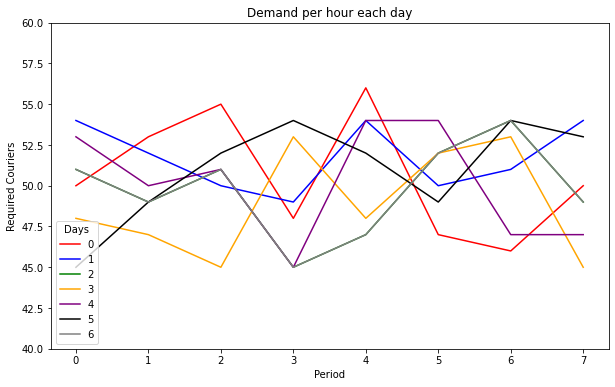

In [ ]:
plt.figure(figsize=(10, 6))
custom_palette = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'grey']

sns.lineplot(data=courier_demand_df.groupby(['day', 'period']).agg({'r_couriers': 'sum'}).reset_index(), 
             x='period', y='r_couriers', hue='day', palette=custom_palette)
plt.xlabel('Period')
plt.ylabel('Required Couriers')
plt.title('Demand per hour each day')
plt.ylim(40, 60)
plt.legend(title='Days')
plt.show()